In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
np.random.seed(245)

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from tensorflow.keras.utils import to_categorical


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

df_train = pd.read_csv("../Dataset for In-Class Demo/train.csv")
df_test = pd.read_csv("../Dataset for In-Class Demo/test.csv")

In [ ]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 0:784]

print(X_test.shape)

(28000, 784)


In [ ]:
df_label.shape

(42000,)

In [ ]:
df_features.shape

(42000, 784)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label,
                                                test_size = 0.2,
                                                random_state = 1212)

print(X_train.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_cv.shape)


(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [ ]:
X_train = X_train.to_numpy().reshape(33600, 784)
X_cv = X_cv.to_numpy().reshape(8400, 784)

X_test = X_test.to_numpy().reshape(28000, 784)

In [ ]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)


(33600, 784)
(8400, 784)
(28000, 784)


In [ ]:
print((min(X_cv[1]), max(X_cv[1])))

(0, 255)


In [ ]:
# Feature Normalization
X_train = X_train.astype('float32');
X_cv= X_cv.astype('float32');
X_test = X_test.astype('float32')
X_train /= 255;
X_cv /= 255;
X_test /= 255

# Convert labels to One Hot Encoded
num_digits = 10
y_train = to_categorical(y_train, num_digits)
y_cv = to_categorical(y_cv, num_digits)

In [ ]:
# Printing 2 examples of labels after conversion
print(y_train[0]) # 2
print(y_train[3]) # 7

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128
n_hidden_4 = 64
num_digits = 10

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
xx = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
xxx = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(xx)
xxxx = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(xxx)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(xxxx)
# Inp -> X_layer1 -> X -> X_layer2 -> X_layer_3 -> X_layer_4 -> Output

In [ ]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
model = Model(Inp, output)
model.summary() # We have 297,910 parameters to estimate

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_3 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_4 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
# adam = tf.keras.optimizers.ADAM(lr=learning_rate)


In [ ]:
# We rely on the plain vanilla Stochastic Gradient Descent as our optimizing methodology
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 1,
                     validation_data=(X_cv, y_cv))



Epoch 1/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6891 - loss: 0.9915 - val_accuracy: 0.9335 - val_loss: 0.2199
Epoch 2/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9419 - loss: 0.1916 - val_accuracy: 0.9554 - val_loss: 0.1452
Epoch 3/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9612 - loss: 0.1235 - val_accuracy: 0.9543 - val_loss: 0.1452
Epoch 4/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0825 - val_accuracy: 0.9667 - val_loss: 0.1114
Epoch 5/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9831 - loss: 0.0563 - val_accuracy: 0.9700 - val_loss: 0.0997
Epoch 6/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0493 - val_accuracy: 0.9677 - val_loss: 0.1082
Epoch 7/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0343 - val_accuracy: 0.9746 - val_loss: 0.0873
Epoch 8/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0248 - val_accuracy: 0.

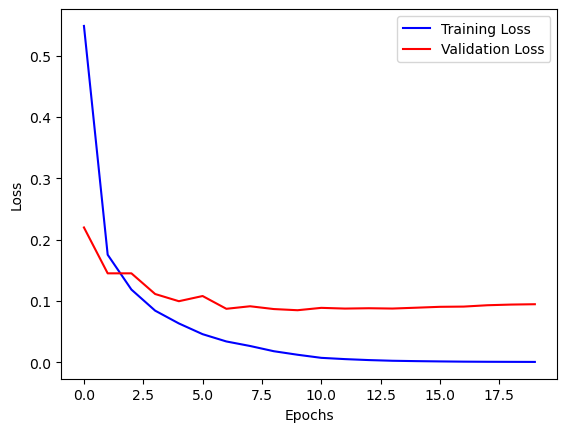

In [ ]:

import matplotlib.pyplot as plt

# Plot the training and validation loss for each epoch
plt.plot(history1.history['loss'], color='b', label='Training Loss')
plt.plot(history1.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [ ]:
score = model.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09479735046625137
Test accuracy: 0.9797618985176086


# Another Way

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

# We rely on ADAM as our optimizing methodology
model2 = Model(Inp, output)

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_3 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_4 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,725,152 (6.58 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,150,102 (4.39 MB)

In [ ]:
history2 = model2.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 0,
                      validation_data=(X_cv, y_cv))

score = model.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09479735046625137
Test accuracy: 0.9797618985176086


In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

learning_rate = 0.01
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model2a = Model(Inp, output)

model2a.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
model2a.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_3 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_4 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2a = model2a.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                        verbose = 1,
                        validation_data=(X_cv, y_cv))

score = model.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7786 - loss: 0.7045 - val_accuracy: 0.9445 - val_loss: 0.2002
Epoch 2/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9527 - loss: 0.1736 - val_accuracy: 0.9492 - val_loss: 0.1835
Epoch 3/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9638 - loss: 0.1271 - val_accuracy: 0.9601 - val_loss: 0.1518
Epoch 4/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9661 - loss: 0.1182 - val_accuracy: 0.9655 - val_loss: 0.1474
Epoch 5/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0943 - val_accuracy: 0.9649 - val_loss: 0.1514
Epoch 6/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9740 - loss: 0.0931 - val_accuracy: 0.9646 - val_loss: 0.1542
Epoch 7/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9802 - loss: 0.0765 - val_accuracy: 0.9689 - val_loss: 0.1270
Epoch 8/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9797 - loss: 0.0795 - val_accuracy: 0.

# What if you bump LR too much

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

learning_rate = 0.5
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model2b = Model(Inp, output)

model2b.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
history2b = model2b.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                            validation_data=(X_cv, y_cv))

score = model2b.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1006 - loss: 26211.4707 - val_accuracy: 0.0929 - val_loss: 2.3184
Epoch 2/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1006 - loss: 2.3226 - val_accuracy: 0.1086 - val_loss: 2.3156
Epoch 3/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1049 - loss: 2.3252 - val_accuracy: 0.0963 - val_loss: 2.3317
Epoch 4/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1024 - loss: 2.3275 - val_accuracy: 0.0963 - val_loss: 2.3395
Epoch 5/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0967 - loss: 2.3282 - val_accuracy: 0.1086 - val_loss: 2.3282
Epoch 6/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1024 - loss: 2.3350 - val_accuracy: 0.1086 - val_loss: 2.3272
Epoch 7/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1038 - loss: 2.3286 - val_accuracy: 0.1035 - val_loss: 2.3197
Epoch 8/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0992 - loss: 2.3296 - val_accuracy

# Another Way

In [ ]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 100
n_hidden_5 = 200
num_digits = 10

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [ ]:
# Our model would have '7' layers - input layer, 5 hidden layer and 1 output layer
model3 = Model(Inp, output)
model3.summary() # We have 308,010 parameters to estimate

In [ ]:
# We rely on 'Adam' as our optimizing methodology
adam = tf.keras.optimizers.Adam(lr=0.01)

model3.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

ValueError: Argument(s) not recognized: {'lr': 0.01}

In [ ]:
history3 = model3.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      validation_data=(X_cv, y_cv),
                      verbose=2)

score = model3.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'model3' is not defined

In [ ]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [ ]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
model4 = Model(Inp, output)
model4.summary() # We have 297,910 parameters to estimate

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0   

In [ ]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model4.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = training_epochs,
                    validation_data=(X_cv, y_cv))

Epoch 1/20
336/336 [==============================] - 4s 5ms/step - loss: 0.5735 - accuracy: 0.8174 - val_loss: 0.2114 - val_accuracy: 0.9398
Epoch 2/20
336/336 [==============================] - 2s 4ms/step - loss: 0.2372 - accuracy: 0.9291 - val_loss: 0.1437 - val_accuracy: 0.9575
Epoch 3/20
336/336 [==============================] - 1s 4ms/step - loss: 0.1732 - accuracy: 0.9481 - val_loss: 0.1217 - val_accuracy: 0.9649
Epoch 4/20
336/336 [==============================] - 2s 5ms/step - loss: 0.1465 - accuracy: 0.9570 - val_loss: 0.1091 - val_accuracy: 0.9688
Epoch 5/20
336/336 [==============================] - 2s 6ms/step - loss: 0.1224 - accuracy: 0.9639 - val_loss: 0.1162 - val_accuracy: 0.9674
Epoch 6/20
336/336 [==============================] - 2s 5ms/step - loss: 0.1092 - accuracy: 0.9668 - val_loss: 0.0942 - val_accuracy: 0.9746
Epoch 7/20
336/336 [==============================] - 1s 4ms/step - loss: 0.0989 - accuracy: 0.9710 - val_loss: 0.0989 - val_accuracy: 0.9736
Epoch 

KeyboardInterrupt: 

In [ ]:
score = model4.evaluate(X_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
X_test

In [ ]:
import pandas as pd
test_pred = pd.DataFrame(model4.predict(X_test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

In [ ]:
test_pred.to_csv('mnist_submission.csv', index = False)